In [6]:
from pennylane_functions import loss_function, func_and_deriv
from pennylane import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [7]:
#Set seed:
RANDOM_STATE = 42
seed = np.random.seed(RANDOM_STATE)

epochs = 100
num_qubits = 6
x = np.linspace(0,0.9,20)
l = 5

In [8]:
def training(epochs):
    losses = []
    theta = np.array(2*np.pi*np.random.random(num_qubits*l*3), requires_grad=True)
    for i in range(epochs):
        print("epoch number = ", i)
        loss = loss_function(x,num_qubits,theta, l)
        print("Current loss:", loss)
        losses.append(loss)
        optimizer = qml.AdamOptimizer()
        theta, cost_val = optimizer.step_and_cost(lambda theta: loss_function(x,num_qubits,theta, l), theta)
        print("Finished optimizing.")
        print()

    return theta, losses

epoch number =  0
Current loss: 34.48464648530382
Finished optimizing.

epoch number =  1
Current loss: 21.62496816865896
Finished optimizing.

epoch number =  2
Current loss: 13.2415437083073
Finished optimizing.

epoch number =  3
Current loss: 8.680020059621654
Finished optimizing.

epoch number =  4
Current loss: 5.081094423687734
Finished optimizing.

epoch number =  5
Current loss: 2.855011846899386
Finished optimizing.

epoch number =  6
Current loss: 1.9576309022335359
Finished optimizing.

epoch number =  7
Current loss: 3.2451240105793318
Finished optimizing.

epoch number =  8
Current loss: 1.912170267536754
Finished optimizing.

epoch number =  9
Current loss: 3.1731938733014107
Finished optimizing.

epoch number =  10
Current loss: 1.8722011578898115
Finished optimizing.

epoch number =  11
Current loss: 3.0422231253300733
Finished optimizing.

epoch number =  12
Current loss: 1.8595523890002181
Finished optimizing.

epoch number =  13
Current loss: 3.0261113626953673
Fini

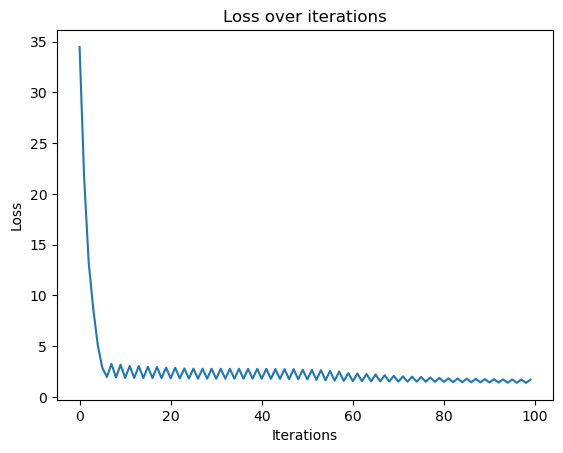

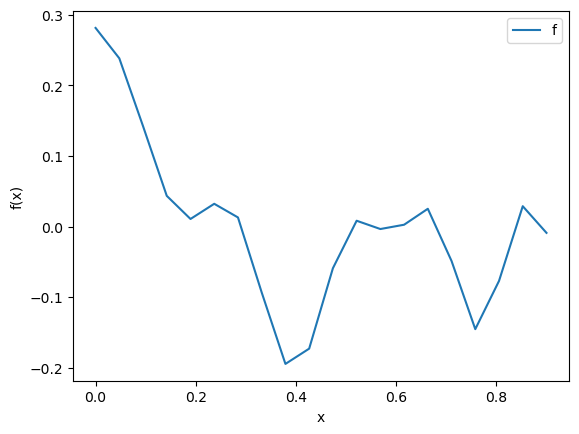

In [9]:
theta_opt, losses = training(epochs)

#Plot the results
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations")
plt.show()

f, df = func_and_deriv(x, num_qubits, theta_opt, l)

plt.plot(x, f, label="f")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()